In [191]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq
from math import pi
from scipy import stats 

In [192]:
N = 1000
dx = 0.001

x = np.linspace(-N/2*dx, (N/2-1)*dx, N, endpoint=False)
b1,b2,b3 = np.random.uniform(0,2*pi,3)
# y = np.exp(-x**2)
# y = np.sin(2*pi*x) + 2*np.sin(10*2*pi*x) + 3*np.sin(20*2*pi*x) + 4*np.sin(30*2*pi*x)
y = np.sin(x) + np.sin(10*x+b1) + np.sin(20*x+b2) + np.sin(30*x+b3)

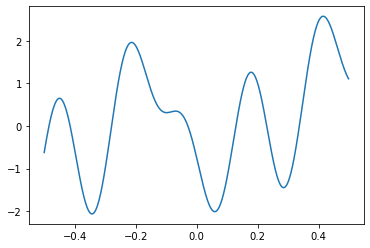

In [193]:
plt.plot(x, y)
plt.show()

In [194]:
# calculate f_p

# px = 1/2/pi
px = stats.norm.pdf(x, loc=0, scale=1)
fp = np.sqrt(px) * (y - np.mean(y))

In [195]:
# method 1: Fourier transform 

1000


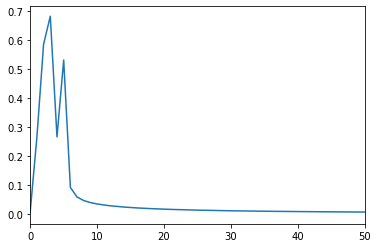

In [196]:
# discrete fourier transform 

def fft1(gn):
    N = len(gn)
    t = np.linspace(0, 1.0, N)
    k = np.linspace(-N/2, N/2-1, N)
    f = np.arange(N, dtype=complex)
    
    for index in k:
        index = int(index)
        f[index]=complex(np.sum(np.cos(2*np.pi*index*t)*gn), -np.sum(np.sin(2*np.pi*index*t)*gn))
    return f

yf1 = fft1(fp)
print(len(yf1))
xf = fftfreq(N,dx)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(0,50)
plt.show()

1000


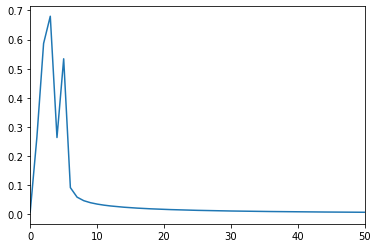

In [197]:
# fast Fourier transform

yf = fft(fp)
print(len(yf))

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0,50)
plt.show()

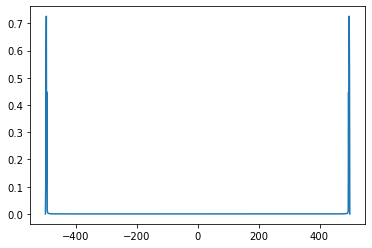

In [198]:
# the minimization function 

dw = 2*pi/N/dx 
K = np.linspace(-N/2, N/2-1, N)
# print(len(K))
exp_k = np.array(np.zeros(N), dtype = complex)

for i in range(len(K)-1): 
    # print(K[i])
    exp_k[i] = complex(np.cos(K[i]*pi), -np.sin(K[i]*pi))
    # print(Fp)
f2 = np.abs(yf * exp_k * dx)**2 * dw

plt.plot(K,f2)
plt.show()

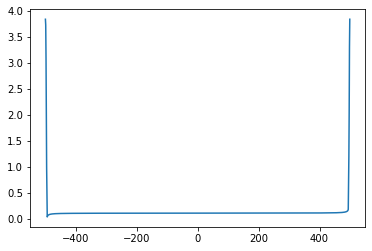

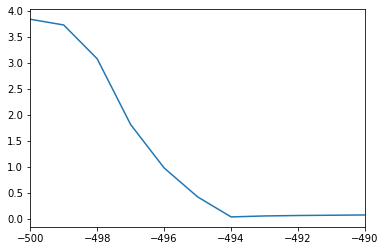

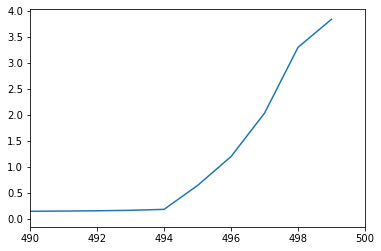

In [199]:
def func(k): 
    k = int(k + N/2) 
    if k==0: 
        low = f2[0]
        high = sum(f2[1:N-1])
    elif k==N-1:
        low = sum(f2[0:N-1])
        high = 0 
    else:
        low = sum(f2[0:k])
        high = sum(f2[k+1:N-1])
    f = np.abs(low-high)
    return f

n0 = np.linspace(1, N, N)
f0 = np.zeros(N)
for k in K:
    i = k + N/2
    i = int(i)
    f0[i] = func(k)

plt.plot(K, f0)
plt.show()

plt.plot(K, f0)
plt.xlim(-500,-490)
plt.show()

plt.plot(K, f0)
plt.xlim(490,500)
plt.show()

In [200]:
# calculate the cut-off w0

f_min = min(f0)
print(f_min)

w0 = np.argmin(f0) - N/2
print(w0)

0.03736588828984977
-494.0


In [201]:
# training the function with NN 

# random sample from U(-pi,pi)
# x_train = np.random.uniform(-pi,pi,512)
x_train = np.random.normal(0, 1, 1000)
y_train = np.sin(x_train) + np.sin(10*x_train+b1) + np.sin(20*x_train+b2) + np.sin(30*x_train+b3)
# y_train = np.sin(2*pi*x_train) + 2*np.sin(10*2*pi*x_train) + 3*np.sin(20*2*pi*x_train) + 4*np.sin(30*2*pi*x_train)

# reshaping 
x_train = x_train.reshape((len(x_train), 1))
# print(len(x_train))
y_train = y_train.reshape((len(y_train), 1))
# print(len(y_train))

In [202]:
import tensorflow as tf 
from tensorflow import keras 

In [203]:
# define the keras model 
K = 64
input_layer = keras.Input(shape = (1, ))
hidden_layer_1 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_2 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_3 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_4 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_5 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
output_layer = keras.layers.Dense(units = 1, 
                                    use_bias = False)
model = keras.Sequential([input_layer, hidden_layer_1,
                          hidden_layer_2, hidden_layer_3, 
                          hidden_layer_4, hidden_layer_5, 
                          output_layer])

# compling the model 
adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer = 'adam', loss = 'mse')

In [204]:
# fitting the data 
beta = model.fit(x_train, y_train, epochs=20, batch_size=32)

# predicting the data
predict_1 = model.predict(x)

Epoch 1/20
32/32 [==============================] - 0s 645us/step - loss: 2.0710
Epoch 2/20
32/32 [==============================] - 0s 613us/step - loss: 2.0145
Epoch 3/20
32/32 [==============================] - 0s 613us/step - loss: 2.0354
Epoch 4/20
32/32 [==============================] - 0s 645us/step - loss: 2.0198
Epoch 5/20
32/32 [==============================] - 0s 678us/step - loss: 2.0090
Epoch 6/20
32/32 [==============================] - 0s 678us/step - loss: 2.0189
Epoch 7/20
32/32 [==============================] - 0s 645us/step - loss: 1.9688
Epoch 8/20
32/32 [==============================] - 0s 645us/step - loss: 1.8304
Epoch 9/20
32/32 [==============================] - 0s 678us/step - loss: 1.6112
Epoch 10/20
32/32 [==============================] - 0s 678us/step - loss: 1.5576
Epoch 11/20
32/32 [==============================] - 0s 645us/step - loss: 1.5466
Epoch 12/20
32/32 [==============================] - 0s 613us/step - loss: 1.5593
Epoch 13/20
32/32 [======

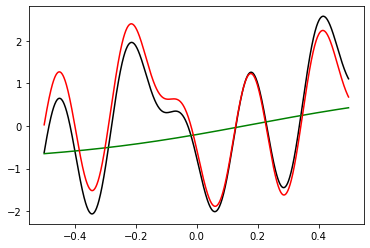

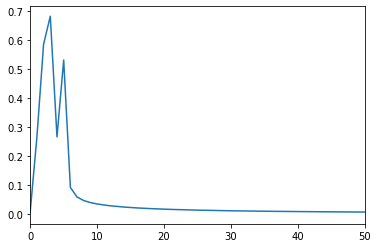

In [205]:
# compute r
predict_1 = predict_1.reshape(N)
r = y - predict_1

plt.plot(x, y, color='black')
plt.plot(x, predict_1, color='green')
plt.plot(x, r, color='red')
plt.show()


# calculate r_p
rp = np.sqrt(px) * (r - np.mean(r))


# Fourier transform 
rf = fft(rp)
xf = fftfreq(N,dx)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(0, 50)
plt.show()

In [206]:
# compute sum_low
r2 = np.abs(rf * exp_k * dx)**2 * dw
r_sum_low = sum(r2[0:int(w0+N/2)])
# print(r_sum_low)

# compute SB
a = r_sum_low
b = sum(f2)
e_low = a/b 
print(e_low)

var_r = np.var(r)
var_f = np.var(y)
FVU = var_r/var_f 
print(FVU)
SB = (FVU-2*e_low)/FVU
print(SB)

0.46850099069651335
0.915881522806961
-0.02306025185586939


Epoch 1/100
32/32 [==============================] - 0s 807us/step - loss: 1.5443
Epoch 2/100
32/32 [==============================] - 0s 645us/step - loss: 1.5355
Epoch 3/100
32/32 [==============================] - 0s 645us/step - loss: 1.5395
Epoch 4/100
32/32 [==============================] - 0s 678us/step - loss: 1.5532
Epoch 5/100
32/32 [==============================] - 0s 645us/step - loss: 1.5568
Epoch 6/100
32/32 [==============================] - 0s 613us/step - loss: 1.5438
Epoch 7/100
32/32 [==============================] - 0s 645us/step - loss: 1.5341
Epoch 8/100
32/32 [==============================] - 0s 710us/step - loss: 1.5412
Epoch 9/100
32/32 [==============================] - 0s 742us/step - loss: 1.5470
Epoch 10/100
32/32 [==============================] - 0s 807us/step - loss: 1.5468
Epoch 11/100
32/32 [==============================] - 0s 710us/step - loss: 1.5375
Epoch 12/100
32/32 [==============================] - 0s 678us/step - loss: 1.5632
Epoch 13/100


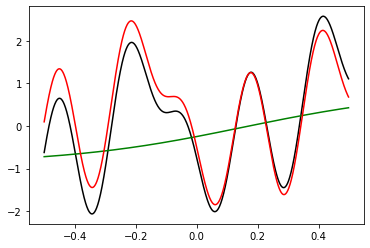

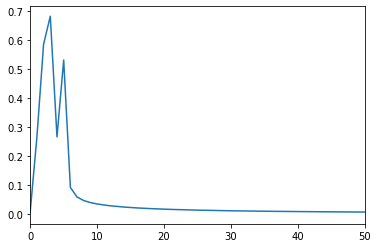

0.18069334622577168
0.9165199514152003
0.6056968624703417


In [207]:
# fitting the data 
beta = model.fit(x_train, y_train, epochs=100, batch_size=32)

# predicting the data
predict_1 = model.predict(x)

# compute r
predict_1 = predict_1.reshape(N)
r = y - predict_1

plt.plot(x, y, color='black')
plt.plot(x, predict_1, color='green')
plt.plot(x, r, color='red')
plt.show()


# calculate r_p
rp = px * (r - np.mean(r))


# Fourier transform 
rf = fft(rp)
xf = fftfreq(N,dx)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(0, 50)
plt.show()

# compute sum_low
r2 = np.abs(rf * exp_k * dx)**2 * dw
r_sum_low = sum(r2[0:int(w0+N/2)])
# print(r_sum_low)

# compute SB
a = r_sum_low
b = sum(f2)
e_low = a/b 
print(e_low)

var_r = np.var(r)
var_f = np.var(y)
FVU = var_r/var_f 
print(FVU)
SB = (FVU-2*e_low)/FVU
print(SB)

Epoch 1/1000
32/32 [==============================] - 0s 678us/step - loss: 1.5450
Epoch 2/1000
32/32 [==============================] - 0s 678us/step - loss: 1.5440
Epoch 3/1000
32/32 [==============================] - 0s 613us/step - loss: 1.5408
Epoch 4/1000
32/32 [==============================] - 0s 645us/step - loss: 1.5336
Epoch 5/1000
32/32 [==============================] - 0s 613us/step - loss: 1.5437
Epoch 6/1000
32/32 [==============================] - 0s 613us/step - loss: 1.5797
Epoch 7/1000
32/32 [==============================] - 0s 613us/step - loss: 1.5593
Epoch 8/1000
32/32 [==============================] - 0s 645us/step - loss: 1.5374
Epoch 9/1000
32/32 [==============================] - 0s 645us/step - loss: 1.5352
Epoch 10/1000
32/32 [==============================] - 0s 678us/step - loss: 1.5358
Epoch 11/1000
32/32 [==============================] - 0s 613us/step - loss: 1.5321
Epoch 12/1000
32/32 [==============================] - 0s 613us/step - loss: 1.5442
E

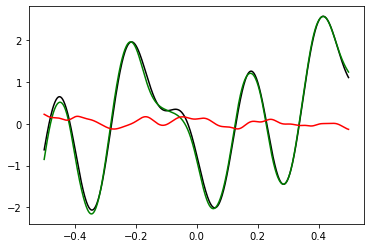

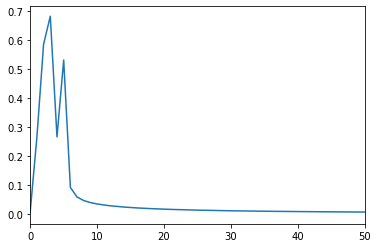

0.0007004689557986572
0.0047092497899407304
0.7025135692335092


In [208]:
# fitting the data 
beta = model.fit(x_train, y_train, epochs=1000, batch_size=32)

# predicting the data
predict_1 = model.predict(x)

# compute r
predict_1 = predict_1.reshape(N)
r = y - predict_1

plt.plot(x, y, color='black')
plt.plot(x, predict_1, color='green')
plt.plot(x, r, color='red')
plt.show()


# calculate r_p
rp = px * (r - np.mean(r))


# Fourier transform 
rf = fft(rp)
xf = fftfreq(N,dx)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(0, 50)
plt.show()

# compute sum_low
r2 = np.abs(rf * exp_k * dx)**2 * dw
r_sum_low = sum(r2[0:int(w0+N/2)])
# print(r_sum_low)

# compute SB
a = r_sum_low
b = sum(f2)
e_low = a/b 
print(e_low)

var_r = np.var(r)
var_f = np.var(y)
FVU = var_r/var_f 
print(FVU)
SB = (FVU-2*e_low)/FVU
print(SB)

Epoch 1/3000
32/32 [==============================] - 0s 678us/step - loss: 0.4867
Epoch 2/3000
32/32 [==============================] - 0s 645us/step - loss: 0.4897
Epoch 3/3000
32/32 [==============================] - 0s 645us/step - loss: 0.4789
Epoch 4/3000
32/32 [==============================] - 0s 645us/step - loss: 0.4863
Epoch 5/3000
32/32 [==============================] - 0s 613us/step - loss: 0.4892
Epoch 6/3000
32/32 [==============================] - 0s 645us/step - loss: 0.4836
Epoch 7/3000
32/32 [==============================] - 0s 678us/step - loss: 0.4850
Epoch 8/3000
32/32 [==============================] - 0s 678us/step - loss: 0.4834
Epoch 9/3000
32/32 [==============================] - 0s 710us/step - loss: 0.4874
Epoch 10/3000
32/32 [==============================] - 0s 710us/step - loss: 0.4806
Epoch 11/3000
32/32 [==============================] - 0s 742us/step - loss: 0.4968
Epoch 12/3000
32/32 [==============================] - 0s 871us/step - loss: 0.4837
E

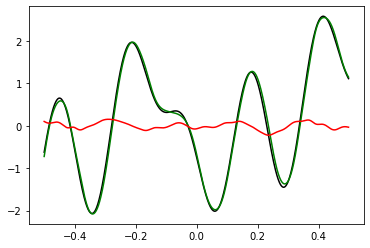

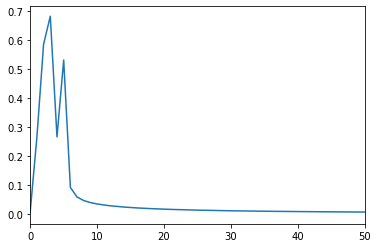

0.0008077386326324701
0.004385017707827264
0.6315916210825534


In [209]:
# fitting the data 
beta = model.fit(x_train, y_train, epochs=3000, batch_size=32)

# predicting the data
predict_1 = model.predict(x)

# compute r
predict_1 = predict_1.reshape(N)
r = y - predict_1

plt.plot(x, y, color='black')
plt.plot(x, predict_1, color='green')
plt.plot(x, r, color='red')
plt.show()


# calculate r_p
rp = px * (r - np.mean(r))


# Fourier transform 
rf = fft(rp)
xf = fftfreq(N,dx)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(0, 50)
plt.show()

# compute sum_low
r2 = np.abs(rf * exp_k * dx)**2 * dw
r_sum_low = sum(r2[0:int(w0+N/2)])
# print(r_sum_low)

# compute SB
a = r_sum_low
b = sum(f2)
e_low = a/b 
print(e_low)

var_r = np.var(r)
var_f = np.var(y)
FVU = var_r/var_f 
print(FVU)
SB = (FVU-2*e_low)/FVU
print(SB)